<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_AULA_13_Notebook_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

## **Representação de Textos**
---


### Álgebra Linear

Ramo da matemática que estuda os espaços vetoriais e as operações em vetores. Em Python, a manipulação de vetores de acordo com a álgebra linear pode ser facilmente feita através da biblioteca `numpy`.

In [1]:
import numpy as np

Vetores podem ser instanciados pelo método *`array`* e variantes como *`zeros`* e *`ones`*

In [2]:
vetor1 = np.array([1., 2., 1., 4.])
vetor2 = np.zeros(4)
vetor3 = np.ones(4)

print('Vetor 1:', vetor1)
print('Vetor 2:', vetor2)
print('Vetor 3:', vetor3)

Vetor 1: [1. 2. 1. 4.]
Vetor 2: [0. 0. 0. 0.]
Vetor 3: [1. 1. 1. 1.]


Soma

In [3]:
vetor1 + vetor3

array([2., 3., 2., 5.])

Subtração

In [4]:
vetor1 - vetor3

array([0., 1., 0., 3.])

Multiplicação

In [5]:
vetor1 * vetor2

array([0., 0., 0., 0.])

Divisão

In [6]:
vetor3 / vetor1

array([1.  , 0.5 , 1.  , 0.25])

Multiplicação de Matrizes

In [7]:
np.dot(vetor1, vetor3)

8.0

## Similaridade por Cossenos

Normalmente em PLN, a distância entre dois vetores é calculada através da **similaridade por cosseno**.

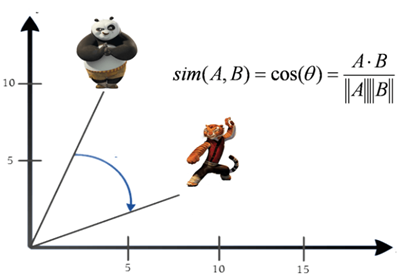

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# vetor de 2 dimensoes (x, y)
po = np.array([[5, 10]])
mestre_tigresa = np.array([[5, 2.5]])

cosine_similarity(po, mestre_tigresa)[0][0]

0.7999999999999999

In [14]:
v1 = np.array([[0, 0]])
v2 = np.array([[1, 1]])

cosine_similarity(v1, v2)[0][0]

0.0

In [17]:
henrique_v = np.array([13, 89, 4, 3])

julio_cesar = np.array([7, 62, 1, 2])

cosine_similarity([henrique_v], [julio_cesar])

array([[0.99906525]])

In [18]:
henrique_v = np.array([13, 89, 4, 3])

noite_reis = np.array([0, 80, 58, 15])

cosine_similarity([henrique_v], [noite_reis])

array([[0.82158093]])

## Representação *One-Hot*

Palavras e documentos são representados por vetores de dimensão do tamanho do vocabulário. Os vetores assumem valores binários (0 ou 1)

Mais Informações: [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [19]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

X = [["no"], ["meio"], ["do"], ["caminho"], ["tinha"], ["uma"], ["pedra"]]

enc.fit(X)
vocab = list(enc.categories_[0])
vetores = enc.transform(X).toarray()

print('Vocabulario: ', vocab)
print()
print('Vetores')
vetores

Vocabulario:  ['caminho', 'do', 'meio', 'no', 'pedra', 'tinha', 'uma']

Vetores


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.]])

Vetor One-Hot de *pedra*

In [20]:
vetores[vocab.index('pedra')]

array([0., 0., 0., 0., 0., 1., 0.])

## Hipótese Distributiva

Formulada pela primeira vez pelos linguistas Joos (1950), Harris (1954) e Firth (1957).


Assume que palavras semelhantes (e.g., oculista e oftalmologista) tendem a ocorrer no mesmo contexto (e.g., próximas de palavras como olhos e examinar).


A diferença de significado entre 2 palavras corresponde à diferença entre seus contextos.

## Matriz de Frequência Termo-Documento

Dado um vocabulário e um conjunto de documentos, as representações das palavras e dos documentos podem ser calculadas a partir da contagem de cada palavra em cada documento.

Mais informações: [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['no meio do caminho tinha uma pedra',
 'tinha uma pedra no meio do caminho',
 'tinha uma pedra',
 'no meio do caminho tinha uma pedra']

vectorizer = CountVectorizer()

vetores = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(vetores.toarray())

Vocabulario
['caminho' 'do' 'meio' 'no' 'pedra' 'tinha' 'uma']

Matriz
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1]]


Acessando o vetor da palavra *meio*

In [ ]:
vetores[:, list(vocab).index('meio')].transpose().toarray()

array([[1, 1, 0, 1]])

Acessando o vetor do verso 3: *tinha uma pedra*

In [ ]:
vetores[2, :].toarray()

array([[0, 0, 0, 0, 1, 1, 1]])

Customizando o contador com um tokenizador próprio:

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
def tokenize(texto):
  return nltk.word_tokenize(texto, language='portuguese')

vectorizer = CountVectorizer(tokenizer=tokenize)

vetores = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(vetores.toarray())

Vocabulario
['caminho' 'do' 'meio' 'no' 'pedra' 'tinha' 'uma']

Matriz
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Matriz Termo-Termo

Dado um vocabulário, a representação de uma palavra pode ser calculada a partir da contagem de sua **coocorrência** com cada palavra do vocabulário num determinado contexto (e.g. documento, sentença etc.).

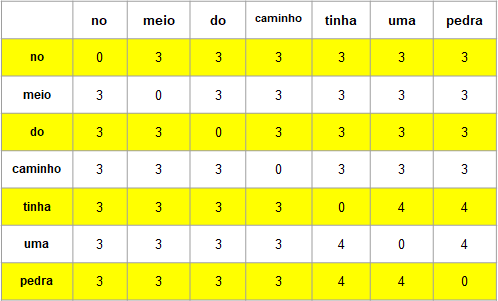

In [24]:
corpus = ['no meio do caminho tinha uma pedra',
 'tinha uma pedra no meio do caminho',
 'tinha uma pedra',
 'no meio do caminho tinha uma pedra']

corpus_tok = [verso.split() for verso in corpus]

vocab = ["no", "meio", "do", "caminho", "tinha", "uma", "pedra"]
vetores = np.zeros((len(vocab), len(vocab)))

for verso in corpus_tok:
  for i, w1 in enumerate(vocab):
    for j, w2 in enumerate(vocab):
      if i != j:
        if w1 in verso and w2 in verso:
          vetores[i, j] += 1

print('Vocabulaaio')
print(vocab)
print()
print('Matriz')
print(vetores)

Vocabulaaio
['no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra']

Matriz
[[0. 3. 3. 3. 3. 3. 3.]
 [3. 0. 3. 3. 3. 3. 3.]
 [3. 3. 0. 3. 3. 3. 3.]
 [3. 3. 3. 0. 3. 3. 3.]
 [3. 3. 3. 3. 0. 4. 4.]
 [3. 3. 3. 3. 4. 0. 4.]
 [3. 3. 3. 3. 4. 4. 0.]]


## Remoção de *stopwords*

Palavras muito frequentes recebem um peso maior, apesar de não serem boas variáveis para distinguir documentos.

*Stopwords* (e.g., artigos, preposições etc.), que possuem alta frequência em todos os documentos, podem ser removidas da contagem para melhorar a distinção entre documentos.

Por exemplo, a dimensão da palavra bom não é boa para distinguir os documentos, já que possui alta frequência em todos eles.

Frequência de 4 palavras em 4 peças teatrais de William Shakespeare:

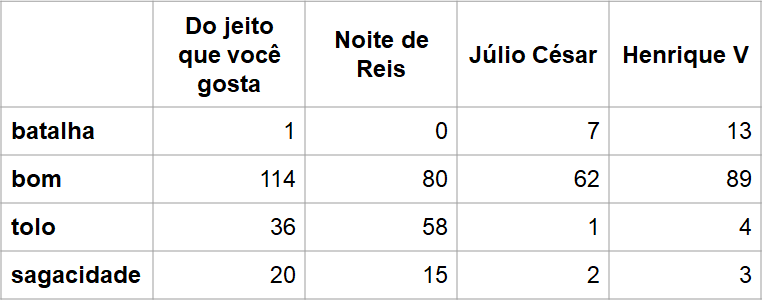

In [25]:
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['no meio do caminho tinha uma pedra',
 'tinha uma pedra no meio do caminho',
 'tinha uma pedra',
 'no meio do caminho tinha uma pedra']

vectorizer = CountVectorizer(stop_words=stopwords)

vetores = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(vetores.toarray())

Vocabulario
['caminho' 'meio' 'pedra']

Matriz
[[1 1 1]
 [1 1 1]
 [0 0 1]
 [1 1 1]]


## TF-IDF

Mais informações: [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

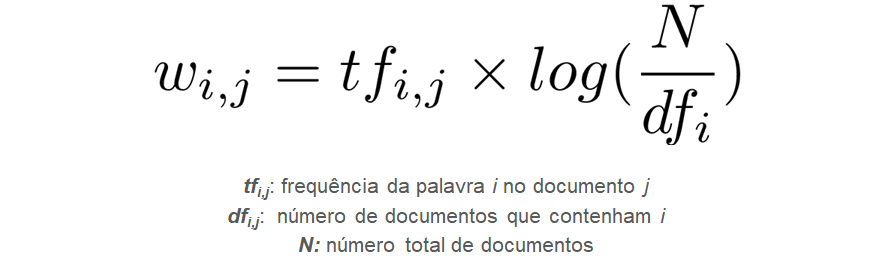

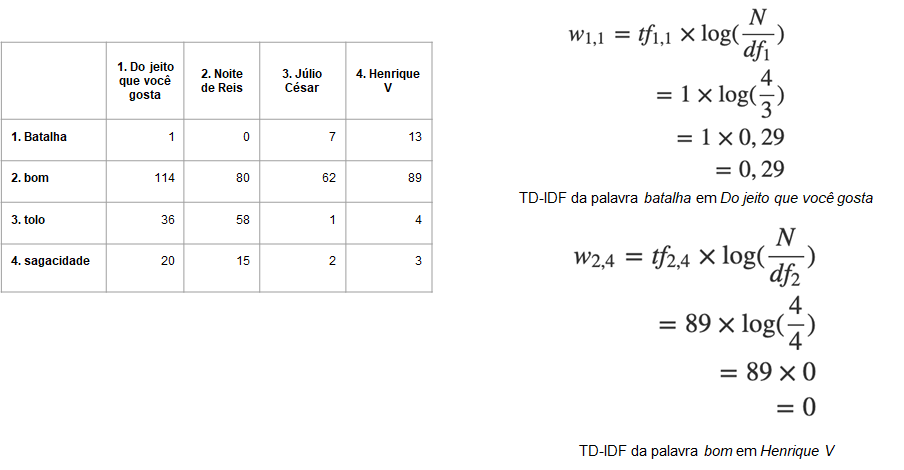

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

corpus = ['ainda que mal pergunte',
 'ainda que mal respondas',
 'ainda que mal te entenda',
 'ainda que mal repitas']

vectorizer = Pipeline([('count', CountVectorizer()),
                 ('tfid', TfidfTransformer())])

vetores = vectorizer.fit_transform(corpus)
vocab = vectorizer['count'].get_feature_names_out()

print('Vocabulario')
print(vocab)
print()
print('Matriz')
print(np.round(vetores.toarray(), 2))

Vocabulario
['ainda' 'entenda' 'mal' 'pergunte' 'que' 'repitas' 'respondas' 'te']

Matriz
[[0.39 0.   0.39 0.74 0.39 0.   0.   0.  ]
 [0.39 0.   0.39 0.   0.39 0.   0.74 0.  ]
 [0.31 0.6  0.31 0.   0.31 0.   0.   0.6 ]
 [0.39 0.   0.39 0.   0.39 0.74 0.   0.  ]]


Acessando o primeiro (*ainda que mal pergunte*) e terceiro (*ainda que mal te entenda*) versos e calculando a similaridade entre eles.

In [ ]:
verso1 = vetores[0, :]
verso3 = vetores[2, :]

cosine_similarity(verso1, verso3)[0][0]

0.3611073242896012

## Word Embeddings

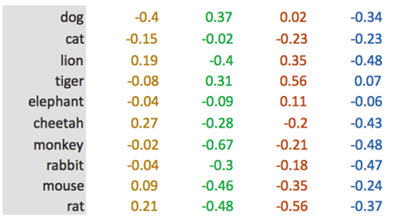

* Representações vetoriais de palavras densas (valores diferentes de 0).

* Assumem uma dimensão fixa (geralmente 300).

* Obtidos a partir de redes neurais.




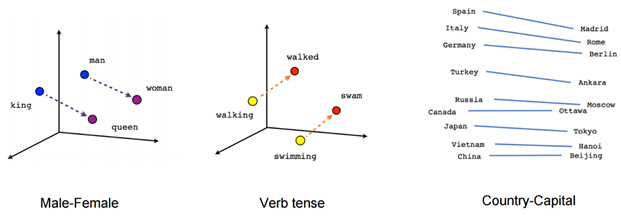

Hipoteticamente, permite inferências lógicas a partir de operações aritméticas em vetores (*v*):

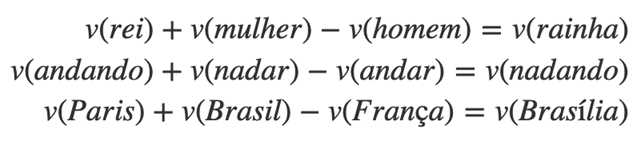

## Word Embeddings em Português

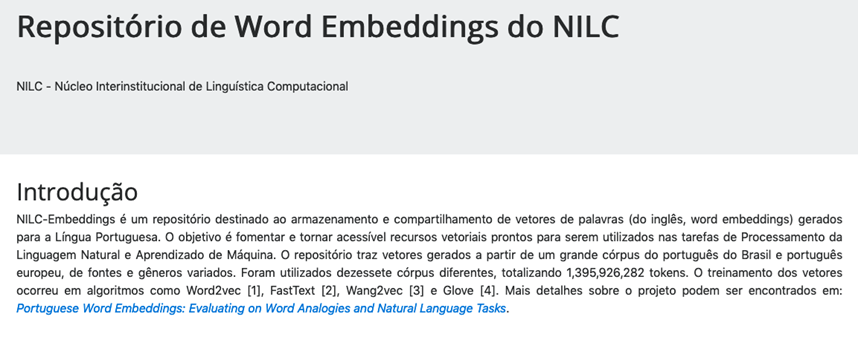

> http://www.nilc.icmc.usp.br/embeddings

Baixando um modelo (leva alguns minutos):

In [27]:
!wget http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s50.zip
!unzip download.php?file=embeddings%2Fword2vec%2Fcbow_s50.zip

--2023-10-31 01:42:11--  http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s50.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170360268 (162M) [application/octet-stream]
Saving to: ‘download.php?file=embeddings%2Fword2vec%2Fcbow_s50.zip’

download.php?file=e 100%[===================>] 162.47M  11.2MB/s    in 47s     

2023-10-31 01:42:58 (3.47 MB/s) - ‘download.php?file=embeddings%2Fword2vec%2Fcbow_s50.zip’ saved [170360268/170360268]

Archive:  download.php?file=embeddings%2Fword2vec%2Fcbow_s50.zip
  inflating: cbow_s50.txt            


Inicializando os word embeddings

In [28]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format('cbow_s50.txt')

Acessando o word embedding da palavra *menino*

In [ ]:
word2vec['menino']

array([ 0.047754, -0.190243,  0.290581,  0.035822,  0.2301  , -0.139099,
       -0.232351, -0.119084,  0.327645,  0.160017, -0.5318  ,  0.093309,
       -0.545777, -0.166715,  0.044872, -0.094386, -0.017529, -0.053898,
        0.189092, -0.233779, -0.302459,  0.707696, -0.146762,  0.258651,
        0.25436 , -0.071892,  0.132296, -0.072721,  0.162642,  0.348834,
        0.129191, -0.030967,  0.048024,  0.26683 , -0.076066,  0.352168,
        0.629779, -0.403468, -0.473612,  0.456509,  0.008285,  0.066872,
        0.082632, -0.128989,  0.107645,  0.119981,  0.219388, -0.141599,
       -0.20074 , -0.30657 ], dtype=float32)

Palavras mais semelhantes ao verbo *estudar*

In [ ]:
word2vec.most_similar('homem')

[('monstro', 0.9085395932197571),
 ('bebé', 0.9072304368019104),
 ('indivíduo', 0.9050756096839905),
 ('rapaz', 0.9036115407943726),
 ('mendigo', 0.9007540345191956),
 ('rapazola', 0.8992964029312134),
 ('novelo', 0.8938027620315552),
 ('pássaro', 0.8897998929023743),
 ('cão', 0.8882535099983215),
 ('cãozinho', 0.8869855403900146)]

Similaridade por cosseno entre os word embeddings das palavras *menino* e *cachorro*

In [ ]:
word2vec.similarity('menino', 'cachorro')

0.8441181

Inferência lógica para: *odiar* está para *odiando*, assim como *amar* está para...

In [ ]:
word2vec.most_similar(positive=['amar', 'odiando'], negative=['odiar'])

[('amando', 0.7472065687179565),
 ('desperto', 0.7231095433235168),
 ('quieto', 0.6835169196128845),
 ('tranqüilo', 0.6812532544136047),
 ('surdo', 0.6798273921012878),
 ('louco', 0.6784767508506775),
 ('quieta', 0.6757060289382935),
 ('sã³brio', 0.6748781204223633),
 ('rouco', 0.6719405651092529),
 ('sossegado', 0.6716687679290771)]

**Word embeddings** de primeira geração são livres de contexto, i.e. cada palavra é representada por um vetor independente do contexto onde se encontra.

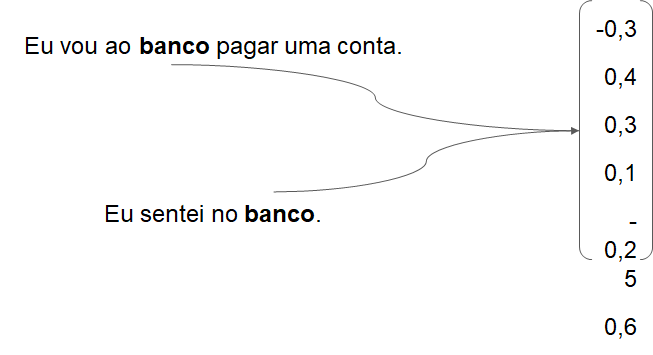

## BERTimbau

BERTimbau é um modelo que gera representações vetoriais sensíveis ao contexto, ou seja, word embeddings sensíveis ao contexto.

In [29]:
!pip3 install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  # or BertModel, for BERT without pretraining heads

In [ ]:
device = 'cpu'# torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-large-portuguese-cased', do_lower_case=False)
bert = AutoModel.from_pretrained('neuralmind/bert-large-portuguese-cased')
bert = bert.to(device)

In [ ]:
texto = 'Eu vou ao banco pagar a conta hoje.'

# tokenizando o texto
input_ids = tokenizer.encode(texto, return_tensors='pt')
wordpieces = tokenizer.convert_ids_to_tokens(input_ids[0])

# salvando ponteiros para palavras
subwords_idx = [] # first subword of each word
for i, wordpiece in enumerate(wordpieces):
    if '##' not in wordpiece and i not in [0, len(wordpieces)-1]:
        subwords_idx.append(i)

# obtendo os vetores para as palavras
input_ids = input_ids.to(device)
with torch.no_grad():
  outs = bert(input_ids)
  vetores = outs[0][0, :]

vetores[subwords_idx]

tensor([[ 0.7381,  0.6351,  0.4160,  ..., -0.5735, -0.9812, -0.6793],
        [ 0.6583, -0.0975,  0.2579,  ..., -0.7367, -0.8734,  0.1407],
        [ 0.7682,  0.2151,  0.1769,  ...,  1.0626, -0.2526, -0.3107],
        ...,
        [-0.0765,  0.4402, -0.5236,  ...,  0.8389, -0.3389, -0.8167],
        [ 0.3460,  1.8568, -0.0262,  ..., -0.0021, -0.0928,  0.0079],
        [ 0.8516,  1.1038, -1.1464,  ...,  0.4630, -0.4967,  0.2980]])

**REFERÊNCIA**

---

Notebook adaptado a partir dos slides do curso online **Linguística Computacional** elaborado por discentes e docentes do Departamento de Ciência da Computação da UFMG, gentilmente cedido pelo professor **Thiago Castro Ferreira**.

Disponível a partir da **Aula 5: Representações Vetoriais para Palavras, Sentenças e Documentos**

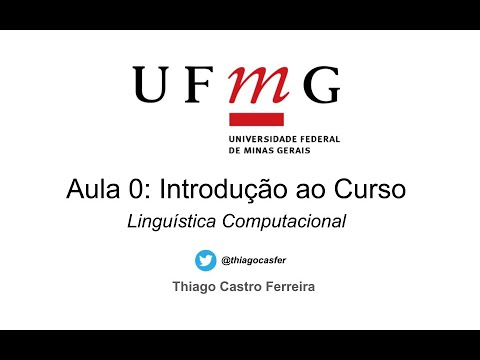

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('T4_J6Q2E4k0', width=550, height=310))